In [98]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head(3) 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [ ]:
What_country = 'India'
df_IN_DA = df[(df['job_country']==What_country ) & (df['job_title_short'] == 'Data Analyst')].copy()


Text(0, 0.5, '')

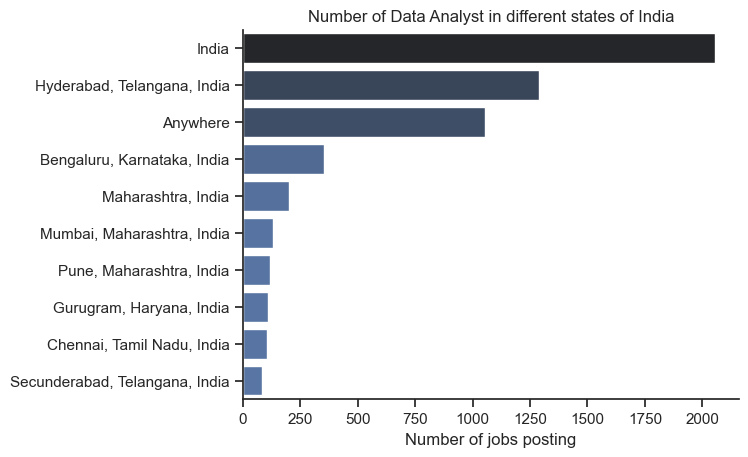

In [100]:
df_plot = df_IN_DA['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot , x='count', y='job_location', hue='count', palette='dark:b_r',legend=False)
sns.despine()
plt.title(f'Number of Data Analyst in different states of {What_country if What_country == 'India' else What_country}')
plt.xlabel("Number of jobs posting")
plt.ylabel("")

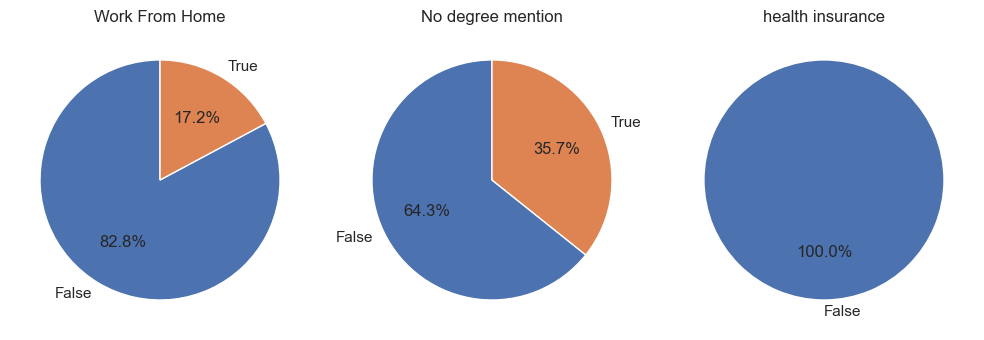

In [101]:
df_plot = df_IN_DA[['job_work_from_home','job_no_degree_mention','job_health_insurance']]
# df_plot['job_work_from_home'].value_counts().plot(kind='pie',startangle=90)
fig, ax = plt.subplots(1,3)
fig.set_size_inches((10,5))
df_plot['job_work_from_home'].value_counts().plot(kind='pie',title='Work From Home',startangle=90, ax=ax[0], autopct='%1.1f%%',ylabel="")
df_plot['job_no_degree_mention'].value_counts().plot(kind='pie',title='No degree mention',startangle=90, ax=ax[1], autopct='%1.1f%%',ylabel="")
df_plot['job_health_insurance'].value_counts().plot(kind='pie',startangle=90, ax=ax[2], autopct='%1.1f%%',ylabel="")
plt.title('health insurance')
plt.tight_layout()



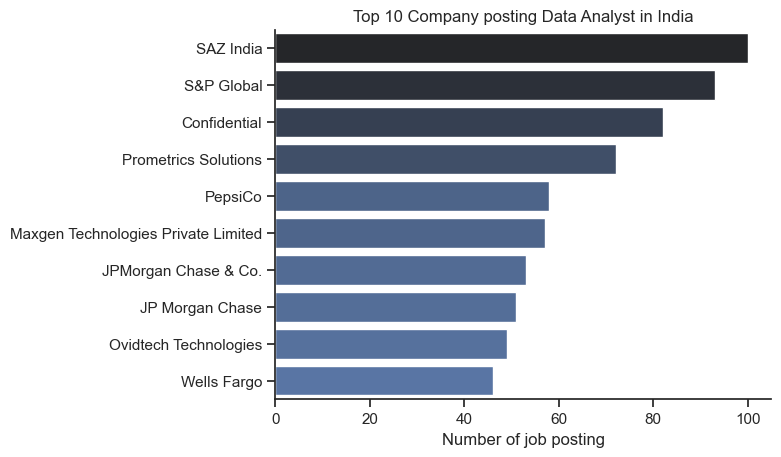

In [102]:
df_plot = df_IN_DA[['company_name']].value_counts().head(10).to_frame()

sns.barplot(data=df_plot,x='count', y='company_name',hue='count',palette='dark:b_r', legend=False)
plt.title(f"Top 10 Company posting Data Analyst in {What_country if What_country == 'India' else What_country}")
sns.despine()
plt.ylabel("")
plt.xlabel("Number of job posting")
plt.show()